In [1]:
import pandas as pd


df = pd.read_excel("Superstore.xlsx")


df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06 00:00:00,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:

df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


In [4]:

df_monthly = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().reset_index()


df_monthly.columns = ['ds', 'y']


df_monthly.head()


,ds,y
0,2014-01-31,28953.706
1,2014-02-28,12743.108
2,2014-03-31,54801.906
3,2014-04-30,24710.016
4,2014-05-31,29639.834


11:50:30 - cmdstanpy - INFO - Chain [1] start processing
11:50:31 - cmdstanpy - INFO - Chain [1] done processing


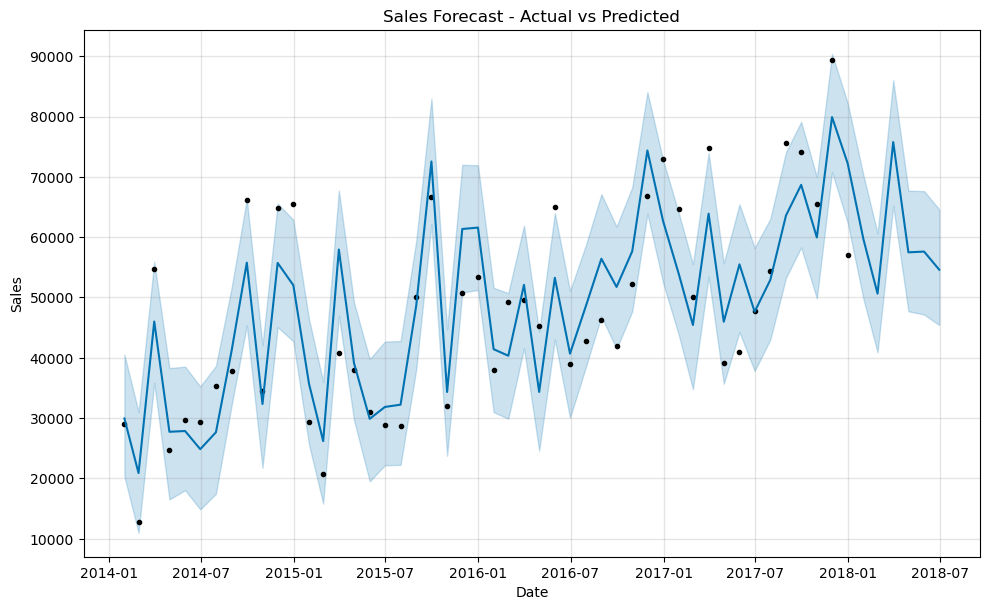

In [5]:
from prophet import Prophet
import matplotlib.pyplot as plt

model = Prophet()
model.fit(df_monthly)


future = model.make_future_dataframe(periods=6, freq='M')


forecast = model.predict(future)


model.plot(forecast)
plt.title("Sales Forecast - Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [6]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("forecast_results.csv", index=False)

print("✅ Forecast exported as forecast_results.csv")


✅ Forecast exported as forecast_results.csv
